In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
columns_names = ['user_id','item_id','ratings','timestamp']

In [20]:
df = pd.read_csv('u.data',sep='\t',names=columns_names)

In [21]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [22]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [23]:
df= pd.merge(df,movie_titles,on='item_id')

In [24]:
df.head()

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [26]:
df.groupby('title')['ratings'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: ratings, dtype: float64

In [28]:
df.groupby('title')['ratings'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [29]:
rating = pd.DataFrame(df.groupby('title')['ratings'].mean())

In [31]:
rating.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [32]:
rating['no of  ratings'] = pd.DataFrame(df.groupby('title')['ratings'].count())
rating.head()

,ratings,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


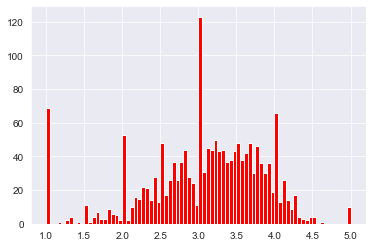

In [37]:
sns.set_style('dark')
rating['ratings'].hist(bins=80,color='red')

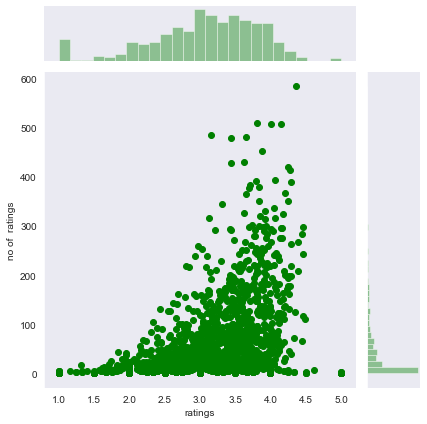

In [36]:
sns.jointplot(data=rating,x='ratings',y='no of  ratings',color='green')

In [38]:
moviemat = df.pivot_table(index='user_id',columns='title',values='ratings')

In [39]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
rating.sort_values('no of  ratings',ascending=False)

,ratings,no of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [41]:
fargo_urating = moviemat['Fargo (1996)']
contact_urating = moviemat['Contact (1997)']

In [43]:
similar_to_fargo = moviemat.corrwith(fargo_urating)

C:\Users\mohammed\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mohammed\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [44]:
similar_to_contact = moviemat.corrwith(contact_urating)

C:\Users\mohammed\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\mohammed\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [45]:
corr_fargo = pd.DataFrame(similar_to_fargo,columns=['Correlation'])

In [46]:
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [47]:
corr_fargo.dropna(inplace=True)

In [49]:
corr_fargo.sort_values('Correlation',ascending = False).head(10)

,Correlation
title,
"Smile Like Yours, A (1997)",1.0
Open Season (1996),1.0
"Journey of August King, The (1995)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
"Wedding Gift, The (1994)",1.0
Nowhere (1997),1.0
Captives (1994),1.0
City of Industry (1997),1.0
"Convent, The (Convento, O) (1995)",1.0


In [53]:
corr_contact = pd.DataFrame(similar_to_contact,columns=['Correlation'])

In [54]:
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512


In [55]:
corr_contact.dropna(inplace=True)

In [56]:
corr_fargo = corr_fargo.join(rating['no of  ratings'])
corr_contact = corr_contact.join(rating['no of  ratings'])

In [58]:
corr_fargo[corr_fargo['no of  ratings']>200].sort_values('Correlation',ascending=False).head(10)

,Correlation,no of ratings
title,,
Fargo (1996),1.000000,508
"People vs. Larry Flynt, The (1996)",0.341784,215
Stand by Me (1986),0.332730,227
Amadeus (1984),0.308669,276
2001: A Space Odyssey (1968),0.299882,259
"Graduate, The (1967)",0.295198,239
Raising Arizona (1987),0.293711,256
"Clockwork Orange, A (1971)",0.279690,221
One Flew Over the Cuckoo's Nest (1975),0.259840,264


In [59]:
corr_contact[corr_contact['no of  ratings']>200].sort_values('Correlation',ascending=False).head(10)

,Correlation,no of ratings
title,,
Contact (1997),1.000000,509
Stand by Me (1986),0.349555,227
"Shawshank Redemption, The (1994)",0.302975,283
Sleepless in Seattle (1993),0.289744,213
Butch Cassidy and the Sundance Kid (1969),0.278640,216
Terminator 2: Judgment Day (1991),0.266664,295
"Time to Kill, A (1996)",0.258698,232
Mission: Impossible (1996),0.252731,344
Star Trek: The Wrath of Khan (1982),0.246716,244
